# Week 2: Tackle Overfitting with Data Augmentation

Welcome to this assignment! As in the previous week, you will be using the famous cats vs dogs dataset to train a model that can classify images of dogs from images of cats. For this, you will create your own Convolutional Neural Network in Tensorflow and leverage Keras' image preprocessing utilities, more so this time around since Keras provides excellent support for augmenting image data.

#### TIPS FOR SUCCESSFUL GRADING OF YOUR ASSIGNMENT:

- All cells are frozen except for the ones where you need to submit your solutions or when explicitly mentioned you can interact with it.

- You can add new cells to experiment but these will be omitted by the grader, so don't rely on newly created cells to host your solution code, use the provided places for this.

- You can add the comment # grade-up-to-here in any graded cell to signal the grader that it must only evaluate up to that point. This is helpful if you want to check if you are on the right track even if you are not done with the whole assignment. Be sure to remember to delete the comment afterwards!

- Avoid using global variables unless you absolutely have to. The grader tests your code in an isolated environment without running all cells from the top. As a result, global variables may be unavailable when scoring your submission. Global variables that are meant to be used will be defined in UPPERCASE.

- To submit your notebook, save it and then click on the blue submit button at the beginning of the page.

Let's get started!

In [1]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2024-12-28 23:47:24.117282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735429644.252395    6127 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735429644.290222    6127 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-28 23:47:24.510644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import unittests

<a name="2"></a>
## Dataset exploration

You already saw this in the previous assignment but there is no harm in a quick refreshing.

Let's explore the dataset in the folder `./PetImages`. There is a subdirectory for each class, so one for dogs and one for cats. The complete tree looks like this:

```
.
└── PetImages/
    ├── Cat/
    │   ├── cat_1.jpg
    │   ├── cat_2.jpg
    │   └── ...
    └── Dog/
        ├── dog_1.jpg
        ├── dog_2.jpg
        └── ...
```

In [3]:
# Directory that holds the data
DATA_DIR = './ValidPetImages'

# Subdirectories for each class
data_dir_dogs = os.path.join(DATA_DIR, 'Dog')
data_dir_cats = os.path.join(DATA_DIR, 'Cat')

# os.listdir returns a list containing all files under the given dir
print(f"There are {len(os.listdir(data_dir_dogs))} images of dogs.")
print(f"There are {len(os.listdir(data_dir_cats))} images of cats.")

There are 11217 images of dogs.
There are 11217 images of cats.


It is a good start to know how many images there are of each class but let's actually plot some of them to get a better sense of the kinds of images in the dataset:

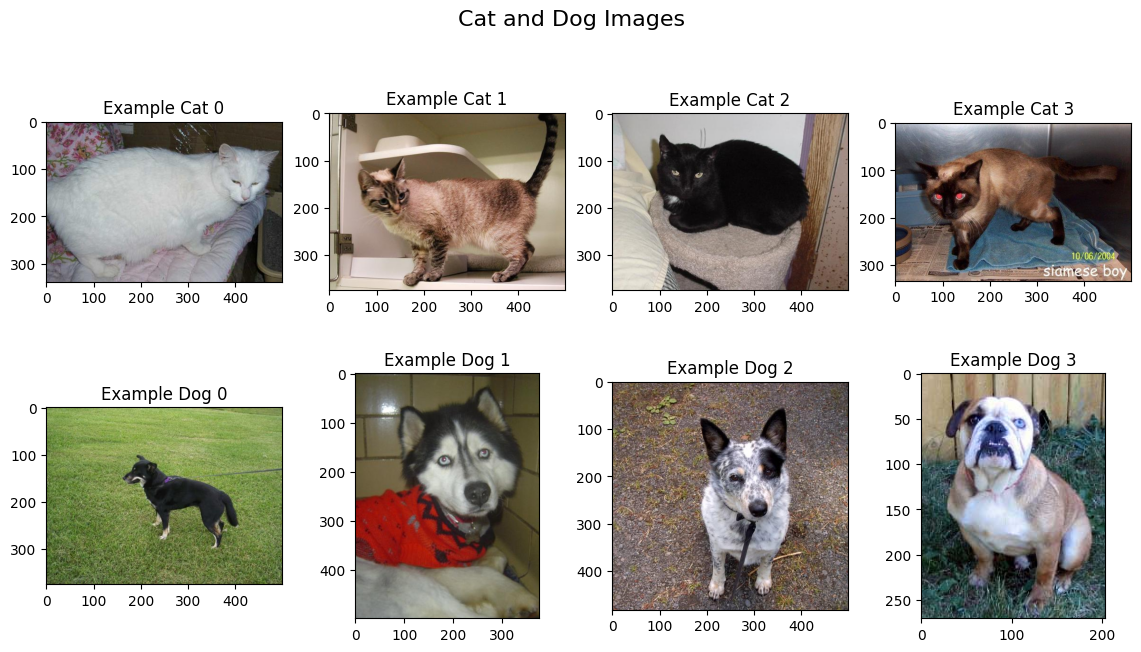

In [4]:
# Get the filenames for cats and dogs images
cats_filenames = [os.path.join(data_dir_cats, filename) for filename in os.listdir(data_dir_cats)]
dogs_filenames = [os.path.join(data_dir_dogs, filename) for filename in os.listdir(data_dir_dogs)]

fig, axes = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle('Cat and Dog Images', fontsize=16)

# Plot the first 4 images of each class
for i, cat_image in enumerate(cats_filenames[:4]):
    img = tf.keras.utils.load_img(cat_image)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Example Cat {i}')

for i, dog_image in enumerate(dogs_filenames[:4]):
    img = tf.keras.utils.load_img(dog_image)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Example Dog {i}')

plt.show()

These sure are cute! **Notice that these images come in all kinds of resolutions!**

<a name="ex01"></a>
## Exercise 1: train_val_datasets

Now that you are familiar with the raw data it is time for you to create the datasets that will yield batches for both for training and validation. For this, complete the `train_val_datasets` function below.


**Hints:**:

- It is recommended to read the documentation for [`tf.keras.utils.image_dataset_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) since this function provides a lot of functionalities.

- You should already know the directory in which the images are stored. You can either use the global variable defined earlier or hardcode the path.

- Remember that the images in this dataset come in a variety of resolutions. This can be standardized  by defining the `image_size` parameter which will be used to convert each image to this target resolution. **For this exercise, use a `image_size` of (120, 120)**. This will help with the time it takes to train the neural network compared to the previous assignment.

- It is recommended to use a `batch_size`  of 128 as it yields a good trade-off between training times and memory usage.
- You should select an appropriate value for the `label_mode` parameter given that you are dealing with binary classification.



- Since the images haven't been splitted into training and validation sets you should use the `validation_split` parameter for this purpose. **You must use 15% of the images as validation dataset**.
- When using the argument `validation_split`, there are two other arguments that **must be passed** otherwise an exception will be thrown. They are:
- - `seed`, a random seed to avoid overlapping files in training and validation (any positive integer is fine)
- - `subset`, which subset should be returned (training, validation or both). You must use the correct value given the context.


In [5]:
# GRADED FUNCTION: train_val_datasets

def train_val_datasets():
    """Creates datasets for training and validation.

    Returns:
        (tf.data.Dataset, tf.data.Dataset): Training and validation datasets.
    """

    ### START CODE HERE ###

    training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=DATA_DIR,
        validation_split=0.15,
        subset='both',
        seed=42,
        image_size=(120, 120),
        batch_size=128,
        label_mode='binary',
        color_mode='rgb'
    )

    ### END CODE HERE ###

    return training_dataset, validation_dataset

In [6]:
# Create the datasets
training_dataset, validation_dataset = train_val_datasets()

Found 22434 files belonging to 2 classes.
Using 19069 files for training.
Using 3365 files for validation.


2024-12-28 23:47:29.952878: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


**Expected Output:**

```
Found 22434 files belonging to 2 classes.
Using 19069 files for training.
Using 3365 files for validation.
```


In [7]:
# Test your code!
unittests.test_train_val_datasets(train_val_datasets)

2024-12-28 23:47:30.795669: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22118400 exceeds 10% of free system memory.
2024-12-28 23:47:30.894948: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22118400 exceeds 10% of free system memory.
2024-12-28 23:47:30.897074: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-28 23:47:30.912396: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22118400 exceeds 10% of free system memory.


 All tests passed!


2024-12-28 23:47:31.019735: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22118400 exceeds 10% of free system memory.
2024-12-28 23:47:31.022688: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<a name="3.2"></a>
Now you have two datasets, one for training and another one for validation. In the ungraded labs you applied some extra transformations to the datasets by using methods of `tf.data.Dataset` such as [prefetch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) or [cache](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache). These help training be faster but they come at the expense of more memory usage and due to memory limitations of this environment, you will not use them in this assignment.


Before proceeding take some time to inspect a batch of the training set, you can do this using the [`take`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) method from a `tf.data.Dataset` while specifying how many batches you want to get. Using this method will yield a tuple with two elements, the first one being the images in the batch and the second one, their respective labels.

In [8]:
# Get the first batch of images and labels
for images, labels in training_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

print(f"Maximum pixel value of images: {np.max(example_batch_images)}\n")
print(f"Shape of batch of images: {example_batch_images.shape}")
print(f"Shape of batch of labels: {example_batch_labels.shape}")

Maximum pixel value of images: 255.0

Shape of batch of images: (128, 120, 120, 3)
Shape of batch of labels: (128, 1)


2024-12-28 23:47:31.067356: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22118400 exceeds 10% of free system memory.


Notice that the pixel values of the images have not yet been normalized at this point so **you must add a Rescaling layer in your model, to apply a factor of 1./255 to these values.**

## Exercise 2: create_augmentation_model

With the data already in an appropriate format, your next task is to define a way to add data augmentation to the datasets, for this, complete the `create_augmentation_model` function below.

In this context you can think of a "model" as a bunch of layers stacked together. Later you will use this function to add these layers to the final model which will be trained to classify cats and dogs images. Tensorflow lets you merge models very easily since models are basically just a collection of layers!

**Hints:** 

- You must NOT include the rescaling layer, i.e, [`tf.keras.layers.Rescaling`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) in this exercise. This function should only take care of data augmentation!

- You must include the [`tf.keras.Input`](https://www.tensorflow.org/api_docs/python/tf/keras/Input) as the first layer with the appropriate shape which is equal to the shape of each image.

- Take a look at the official TF [guide](https://www.tensorflow.org/tutorials/images/data_augmentation) on data augmentation.

- Some layers you might want to include are (but feel free to try others as well):
	- [tf.keras.layers.RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip)

	- [tf.keras.layers.RandomRotation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomRotation)
	- [tf.keras.layers.RandomTranslation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomTranslation)
	- [tf.keras.layers.RandomZoom](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom)


In [9]:
# GRADED FUNCTION: create_augmentation_model
def create_augmentation_model():
    """Creates a model (layers stacked on top of each other) for augmenting images of cats and dogs.

    Returns:
        tf.keras.Model: The model made up of the layers that will be used to augment the images of cats and dogs.
    """

    ### START CODE HERE ###
    
    # Define fill mode.
    FILL_MODE = 'nearest'

    augmentation_model = tf.keras.Sequential([ 
		# Specify the input shape.
    tf.keras.Input(shape=(120,120,3)),
    # Add the augmentation layers
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4, fill_mode=FILL_MODE),
    tf.keras.layers.RandomTranslation(0.2,0.2, fill_mode=FILL_MODE),
    tf.keras.layers.RandomZoom(0.2, fill_mode=FILL_MODE)
    ]) 
    
    ### END CODE HERE ###

    return augmentation_model

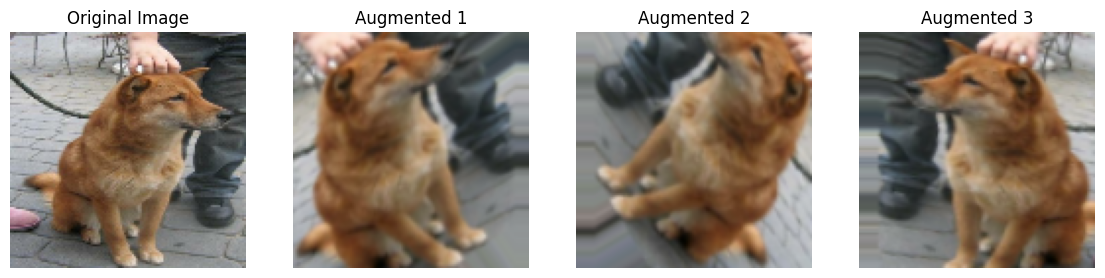

In [10]:
# Load your model for augmentation
data_augmentor = create_augmentation_model()

# Take a sample image
sample_image = tf.keras.utils.array_to_img(example_batch_images[0])

images = [sample_image]

# Apply random augmentation 3 times
for _ in range(3):
	image_aug = data_augmentor(tf.expand_dims(sample_image, axis=0))
	image_aug = tf.keras.utils.array_to_img(tf.squeeze(image_aug))
	images.append(image_aug)


fig, axs = plt.subplots(1, 4, figsize=(14, 7))
for ax, image, title in zip(axs, images, ['Original Image', 'Augmented 1', 'Augmented 2', 'Augmented 3']):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()

**Expected Output:**
```
A figure showing the original sample image alongside 3 random versions of it with augmentation (image may vary)
```
![expected_output](./assets/output.png)

In [11]:
# Test your code!
unittests.test_create_augmentation_model(create_augmentation_model)

 All tests passed!


<a name="ex02"></a>
## Exercise 3: create_model

With the data ready and a way to add augmentation, your next task is to define the architecture of the model that will be trained. Complete the `create_model` function below.

Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is compatible with the `label_mode` you defined in the previous exercise, which should also be compatible with the last layer of your network. You can tell if they aren't compatible if you get an error during training.

**Hints:** 

- You must include the [`tf.keras.Input`](https://www.tensorflow.org/api_docs/python/tf/keras/Input) as the first layer with the appropriate shape. **This must be done even if you already defined this in the previous exercise!**

- You should use at least 3 convolution layers to achieve the desired performance. This is a necessary condition for this function to pass the grading.

- The rescaling layer, i.e, [`tf.keras.layers.Rescaling`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) is usually placed after the data augmentation layers.
- Remember that `tf.keras.Model`s can be stacked on top of each other since they are usually a collection of layers.
- Be mindful about the last layer and its activation function, as it will impact the loss you must use.

In [12]:
# GRADED FUNCTION: create_model

def create_model():
    """Creates the untrained model for classifying cats and dogs.

    Returns:
        tf.keras.Model: The model that will be trained to classify cats and dogs.
    """

    ### START CODE HERE ###

	# Get the augmentation layers (or model) from your earlier function
    augmentation_layers = data_augmentor

	# Don't forget to add the augmentation layers! These usually go right after the Input!
    model = tf.keras.models.Sequential([ 
		tf.keras.Input(shape=(120, 120, 3)),
        augmentation_layers,
        tf.keras.layers.Rescaling(1./255),
        # 1st Convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # 2nd Convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # 3rd Convolution
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # 4th Convolution
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # 5th Convolution
        tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(2048, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]) 

  
    model.compile( 
        loss='binary_crossentropy',
        optimizer='adam',#tf.keras.optimizers.RMSprop(learning_rate=1e-4),
        metrics=['accuracy']
    ) 
    
    ### END CODE HERE ###

    return model

The next cell allows you to check the number of total and trainable parameters of your model and prompts a warning in case these exceeds those of a reference solution, this serves the following 3 purposes listed in order of priority:

- Helps you prevent crashing the kernel during training.

- Helps you avoid longer-than-necessary training times.
- Provides a reasonable estimate of the size of your model. In general you will usually prefer smaller models given that they accomplish their goal successfully.

**Notice that this is just informative** and may be very well below the actual limit for size of the model necessary to crash the kernel. So even if you exceed this reference you are probably fine. However, **if the kernel crashes during training or it is taking a very long time and your model is larger than the reference, come back here and try to get the number of parameters closer to the reference.**

In [13]:
# Create the compiled but untrained model
model = create_model()

# Check parameter count against a reference solution
unittests.parameter_count(model)

Your model has 4,457,793 total parameters and the reference is 6,000,000. You are good to go!

Your model has 4,457,793 trainable parameters and the reference is 6,000,000. You are good to go!


Check that the architecture you used is compatible with the dataset (you can ignore the warnings prompted by using the GPU):

In [14]:
try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (128, 1)


**Expected Output:**

```
predictions have shape: (batch_size, n_units)
```
Where `batch_size` is the one you defined and `n_units` is the number of units of the last layer of your model.

In [15]:
# Test your code!
unittests.test_create_model(create_model)

 All tests passed!


<a name="4.2"></a>

<a name="ex03"></a>
## Exercise 4: EarlyStoppingCallback

With the model's architecture now ready, it is time for you to define a callback to stop training if the following conditions are satisfied:

- Training accuracy greater than or equal to 80%


- Validation accuracy greater than or equal to 80%

You might wonder why the training threshold to pass this assignment is significantly lower compared to last week's assignment. Image augmentation does help with overfitting but usually this comes at the expense of requiring more training time. To keep the training time reasonable, the thresholds are ajusted and your grade will be based on the fact that the model doesn't overfit.

For this, complete the `EarlyStoppingCallback` class below. Remember from course 1 that you must create a class that inherits from `tf.keras.callbacks.Callback` and you must add a method called `on_epoch_end` with the correct signature to add the stop conditions. 

**Hints**:

- You may look at the documentation for [`tf.keras.callbacks.Callback`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)


- Whenever you compile a model with a metric and provide validation data when training that model, TensorFlow will automatically create another metric and append `val_` to its name. Since your model was compiled with the `accuracy` metric and you are using a validation dataset, you will have access to a metric called `val_accuracy`


In [16]:
# GRADED CLASS: EarlyStoppingCallback

### START CODE HERE ###

# Remember to inherit from the correct class
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    # Define the correct function signature for on_epoch_end method
    def on_epoch_end(self, epoch, logs=None):
        # Check if the accuracy is greater or equal to 0.8 and validation accuracy is greater or equal to 0.8
        if logs['accuracy'] >= 0.8 and logs['val_accuracy'] >= 0.8:
            self.model.stop_training = True

            print("\nReached 80% train accuracy and 80% validation accuracy, so cancelling training!")

### END CODE HERE ###

In [17]:
# Test your code!
unittests.test_EarlyStoppingCallback(EarlyStoppingCallback)

 All tests passed!


<a name="5"></a>

Now it is time to train your model! The callback should fire before reaching 35 epochs, if this is not the case, try a different architecture for your model!

In [18]:
# Train the model and save the training history 
# This may take up to 10-15 min so feel free to take a break! :P
history = model.fit(
	training_dataset,
	epochs=35,
	validation_data=validation_dataset,
	callbacks = [EarlyStoppingCallback()]
)

Epoch 1/35
  6/149 ━━━━━━━━━━━━━━━━━━━━ 3:39 2s/step - accuracy: 0.5350 - loss: 0.6920

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 14/149 ━━━━━━━━━━━━━━━━━━━━ 3:23 2s/step - accuracy: 0.5262 - loss: 0.6936

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 36/149 ━━━━━━━━━━━━━━━━━━━━ 2:48 1s/step - accuracy: 0.5145 - loss: 0.6938

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 39/149 ━━━━━━━━━━━━━━━━━━━━ 2:43 1s/step - accuracy: 0.5138 - loss: 0.6938

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 56/149 ━━━━━━━━━━━━━━━━━━━━ 2:17 1s/step - accuracy: 0.5107 - loss: 0.6938

 69/149 ━━━━━━━━━━━━━━━━━━━━ 1:57 1s/step - accuracy: 0.5091 - loss: 0.6937

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 77/149 ━━━━━━━━━━━━━━━━━━━━ 1:46 1s/step - accuracy: 0.5085 - loss: 0.6937

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 82/149 ━━━━━━━━━━━━━━━━━━━━ 1:38 1s/step - accuracy: 0.5082 - loss: 0.6937

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 88/149 ━━━━━━━━━━━━━━━━━━━━ 1:29 1s/step - accuracy: 0.5079 - loss: 0.6937

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


116/149 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.5074 - loss: 0.6936

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5096 - loss: 0.6931

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.5097 - loss: 0.6930 - val_accuracy: 0.5361 - val_loss: 0.8165
Epoch 2/35
 16/149 ━━━━━━━━━━━━━━━━━━━━ 3:12 1s/step - accuracy: 0.5507 - loss: 0.6929

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 30/149 ━━━━━━━━━━━━━━━━━━━━ 2:50 1s/step - accuracy: 0.5336 - loss: 0.6931

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 34/149 ━━━━━━━━━━━━━━━━━━━━ 2:45 1s/step - accuracy: 0.5309 - loss: 0.6931

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 37/149 ━━━━━━━━━━━━━━━━━━━━ 2:40 1s/step - accuracy: 0.5296 - loss: 0.6931

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 48/149 ━━━━━━━━━━━━━━━━━━━━ 2:24 1s/step - accuracy: 0.5271 - loss: 0.6927

 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:23 1s/step - accuracy: 0.5271 - loss: 0.6926

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 55/149 ━━━━━━━━━━━━━━━━━━━━ 2:14 1s/step - accuracy: 0.5271 - loss: 0.6924

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 58/149 ━━━━━━━━━━━━━━━━━━━━ 2:10 1s/step - accuracy: 0.5271 - loss: 0.6923

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 85/149 ━━━━━━━━━━━━━━━━━━━━ 1:31 1s/step - accuracy: 0.5289 - loss: 0.6912

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 98/149 ━━━━━━━━━━━━━━━━━━━━ 1:12 1s/step - accuracy: 0.5305 - loss: 0.6906

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


105/149 ━━━━━━━━━━━━━━━━━━━━ 1:02 1s/step - accuracy: 0.5314 - loss: 0.6903

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5368 - loss: 0.6889

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.5369 - loss: 0.6889 - val_accuracy: 0.5747 - val_loss: 0.6778
Epoch 3/35
  5/149 ━━━━━━━━━━━━━━━━━━━━ 3:20 1s/step - accuracy: 0.6001 - loss: 0.6630

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


  6/149 ━━━━━━━━━━━━━━━━━━━━ 3:21 1s/step - accuracy: 0.5999 - loss: 0.6642

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 11/149 ━━━━━━━━━━━━━━━━━━━━ 3:15 1s/step - accuracy: 0.5913 - loss: 0.6695

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 41/149 ━━━━━━━━━━━━━━━━━━━━ 2:33 1s/step - accuracy: 0.5801 - loss: 0.6751

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:21 1s/step - accuracy: 0.5799 - loss: 0.6753

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 50/149 ━━━━━━━━━━━━━━━━━━━━ 2:20 1s/step - accuracy: 0.5799 - loss: 0.6753

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 64/149 ━━━━━━━━━━━━━━━━━━━━ 2:00 1s/step - accuracy: 0.5819 - loss: 0.6743

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 66/149 ━━━━━━━━━━━━━━━━━━━━ 1:57 1s/step - accuracy: 0.5822 - loss: 0.6742

 77/149 ━━━━━━━━━━━━━━━━━━━━ 1:42 1s/step - accuracy: 0.5846 - loss: 0.6730

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 81/149 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - accuracy: 0.5854 - loss: 0.6726

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


113/149 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5894 - loss: 0.6705

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5925 - loss: 0.6686

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.5926 - loss: 0.6686 - val_accuracy: 0.6152 - val_loss: 0.6508
Epoch 4/35
  8/149 ━━━━━━━━━━━━━━━━━━━━ 3:20 1s/step - accuracy: 0.6482 - loss: 0.6190

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 11/149 ━━━━━━━━━━━━━━━━━━━━ 3:15 1s/step - accuracy: 0.6455 - loss: 0.6234

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 29/149 ━━━━━━━━━━━━━━━━━━━━ 2:50 1s/step - accuracy: 0.6362 - loss: 0.6352

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 37/149 ━━━━━━━━━━━━━━━━━━━━ 2:39 1s/step - accuracy: 0.6358 - loss: 0.6366

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:22 1s/step - accuracy: 0.6348 - loss: 0.6381

 51/149 ━━━━━━━━━━━━━━━━━━━━ 2:19 1s/step - accuracy: 0.6348 - loss: 0.6382

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 65/149 ━━━━━━━━━━━━━━━━━━━━ 1:59 1s/step - accuracy: 0.6342 - loss: 0.6392

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


104/149 ━━━━━━━━━━━━━━━━━━━━ 1:04 1s/step - accuracy: 0.6339 - loss: 0.6397

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


107/149 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6340 - loss: 0.6398 

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


111/149 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6340 - loss: 0.6398

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6346 - loss: 0.6399

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.6346 - loss: 0.6399 - val_accuracy: 0.6330 - val_loss: 0.6387
Epoch 5/35
 13/149 ━━━━━━━━━━━━━━━━━━━━ 3:12 1s/step - accuracy: 0.6810 - loss: 0.6146

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 22/149 ━━━━━━━━━━━━━━━━━━━━ 2:56 1s/step - accuracy: 0.6742 - loss: 0.6159

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 31/149 ━━━━━━━━━━━━━━━━━━━━ 2:43 1s/step - accuracy: 0.6707 - loss: 0.6158

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 43/149 ━━━━━━━━━━━━━━━━━━━━ 2:26 1s/step - accuracy: 0.6670 - loss: 0.6164

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 45/149 ━━━━━━━━━━━━━━━━━━━━ 2:23 1s/step - accuracy: 0.6665 - loss: 0.6165

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 48/149 ━━━━━━━━━━━━━━━━━━━━ 2:19 1s/step - accuracy: 0.6655 - loss: 0.6168

 62/149 ━━━━━━━━━━━━━━━━━━━━ 1:59 1s/step - accuracy: 0.6625 - loss: 0.6176

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 65/149 ━━━━━━━━━━━━━━━━━━━━ 1:55 1s/step - accuracy: 0.6620 - loss: 0.6177

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 80/149 ━━━━━━━━━━━━━━━━━━━━ 1:34 1s/step - accuracy: 0.6603 - loss: 0.6182

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 88/149 ━━━━━━━━━━━━━━━━━━━━ 1:23 1s/step - accuracy: 0.6596 - loss: 0.6186

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


109/149 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6580 - loss: 0.6200

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6564 - loss: 0.6216

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6564 - loss: 0.6216 - val_accuracy: 0.6627 - val_loss: 0.6109
Epoch 6/35
  8/149 ━━━━━━━━━━━━━━━━━━━━ 3:12 1s/step - accuracy: 0.7074 - loss: 0.5755

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 13/149 ━━━━━━━━━━━━━━━━━━━━ 3:05 1s/step - accuracy: 0.6992 - loss: 0.5813

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 34/149 ━━━━━━━━━━━━━━━━━━━━ 2:34 1s/step - accuracy: 0.6880 - loss: 0.5930

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 48/149 ━━━━━━━━━━━━━━━━━━━━ 2:15 1s/step - accuracy: 0.6830 - loss: 0.5970

 52/149 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.6819 - loss: 0.5979

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 57/149 ━━━━━━━━━━━━━━━━━━━━ 2:04 1s/step - accuracy: 0.6807 - loss: 0.5988

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 60/149 ━━━━━━━━━━━━━━━━━━━━ 2:00 1s/step - accuracy: 0.6802 - loss: 0.5992

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 76/149 ━━━━━━━━━━━━━━━━━━━━ 1:39 1s/step - accuracy: 0.6786 - loss: 0.6003

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 90/149 ━━━━━━━━━━━━━━━━━━━━ 1:19 1s/step - accuracy: 0.6781 - loss: 0.6006

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


107/149 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6776 - loss: 0.6007

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6771 - loss: 0.6007

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6771 - loss: 0.6007 - val_accuracy: 0.6621 - val_loss: 0.6076
Epoch 7/35
  6/149 ━━━━━━━━━━━━━━━━━━━━ 3:12 1s/step - accuracy: 0.6961 - loss: 0.5758

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 14/149 ━━━━━━━━━━━━━━━━━━━━ 3:01 1s/step - accuracy: 0.6937 - loss: 0.5815

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 15/149 ━━━━━━━━━━━━━━━━━━━━ 3:00 1s/step - accuracy: 0.6928 - loss: 0.5824

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 35/149 ━━━━━━━━━━━━━━━━━━━━ 2:35 1s/step - accuracy: 0.6873 - loss: 0.5885

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 41/149 ━━━━━━━━━━━━━━━━━━━━ 2:27 1s/step - accuracy: 0.6868 - loss: 0.5890

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:16 1s/step - accuracy: 0.6862 - loss: 0.5899

 53/149 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.6858 - loss: 0.5903

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 59/149 ━━━━━━━━━━━━━━━━━━━━ 2:02 1s/step - accuracy: 0.6855 - loss: 0.5908

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 75/149 ━━━━━━━━━━━━━━━━━━━━ 1:41 1s/step - accuracy: 0.6850 - loss: 0.5915

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 80/149 ━━━━━━━━━━━━━━━━━━━━ 1:34 1s/step - accuracy: 0.6849 - loss: 0.5916

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


116/149 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6846 - loss: 0.5914

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6845 - loss: 0.5914

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6845 - loss: 0.5914 - val_accuracy: 0.7224 - val_loss: 0.5568
Epoch 8/35
 11/149 ━━━━━━━━━━━━━━━━━━━━ 3:10 1s/step - accuracy: 0.6901 - loss: 0.5816

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 17/149 ━━━━━━━━━━━━━━━━━━━━ 2:59 1s/step - accuracy: 0.6897 - loss: 0.5852

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 19/149 ━━━━━━━━━━━━━━━━━━━━ 2:56 1s/step - accuracy: 0.6903 - loss: 0.5855

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 31/149 ━━━━━━━━━━━━━━━━━━━━ 2:41 1s/step - accuracy: 0.6933 - loss: 0.5859

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 41/149 ━━━━━━━━━━━━━━━━━━━━ 2:27 1s/step - accuracy: 0.6938 - loss: 0.5860

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 50/149 ━━━━━━━━━━━━━━━━━━━━ 2:16 1s/step - accuracy: 0.6937 - loss: 0.5865

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 52/149 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.6936 - loss: 0.5867

 57/149 ━━━━━━━━━━━━━━━━━━━━ 2:06 1s/step - accuracy: 0.6933 - loss: 0.5869

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 84/149 ━━━━━━━━━━━━━━━━━━━━ 1:28 1s/step - accuracy: 0.6929 - loss: 0.5869

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


109/149 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6934 - loss: 0.5860

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


115/149 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6936 - loss: 0.5858

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6941 - loss: 0.5852

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6941 - loss: 0.5852 - val_accuracy: 0.7397 - val_loss: 0.5483
Epoch 9/35
  9/149 ━━━━━━━━━━━━━━━━━━━━ 3:09 1s/step - accuracy: 0.6932 - loss: 0.5937

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 11/149 ━━━━━━━━━━━━━━━━━━━━ 3:06 1s/step - accuracy: 0.6961 - loss: 0.5908

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 22/149 ━━━━━━━━━━━━━━━━━━━━ 2:51 1s/step - accuracy: 0.7020 - loss: 0.5831

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 52/149 ━━━━━━━━━━━━━━━━━━━━ 2:10 1s/step - accuracy: 0.7049 - loss: 0.5778

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 56/149 ━━━━━━━━━━━━━━━━━━━━ 2:05 1s/step - accuracy: 0.7045 - loss: 0.5777

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 66/149 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.7040 - loss: 0.5773

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 80/149 ━━━━━━━━━━━━━━━━━━━━ 1:32 1s/step - accuracy: 0.7038 - loss: 0.5766

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 84/149 ━━━━━━━━━━━━━━━━━━━━ 1:27 1s/step - accuracy: 0.7037 - loss: 0.5765

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


111/149 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7029 - loss: 0.5765

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7022 - loss: 0.5764

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.7022 - loss: 0.5764 - val_accuracy: 0.6666 - val_loss: 0.6088
Epoch 10/35
 10/149 ━━━━━━━━━━━━━━━━━━━━ 3:18 1s/step - accuracy: 0.7011 - loss: 0.5918

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 11/149 ━━━━━━━━━━━━━━━━━━━━ 3:16 1s/step - accuracy: 0.7021 - loss: 0.5901

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 19/149 ━━━━━━━━━━━━━━━━━━━━ 3:01 1s/step - accuracy: 0.7024 - loss: 0.5852

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 42/149 ━━━━━━━━━━━━━━━━━━━━ 2:28 1s/step - accuracy: 0.7051 - loss: 0.5769

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 43/149 ━━━━━━━━━━━━━━━━━━━━ 2:26 1s/step - accuracy: 0.7051 - loss: 0.5768

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 48/149 ━━━━━━━━━━━━━━━━━━━━ 2:19 1s/step - accuracy: 0.7051 - loss: 0.5762

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:17 1s/step - accuracy: 0.7052 - loss: 0.5760

 53/149 ━━━━━━━━━━━━━━━━━━━━ 2:12 1s/step - accuracy: 0.7054 - loss: 0.5754

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 85/149 ━━━━━━━━━━━━━━━━━━━━ 1:27 1s/step - accuracy: 0.7069 - loss: 0.5722

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 87/149 ━━━━━━━━━━━━━━━━━━━━ 1:24 1s/step - accuracy: 0.7070 - loss: 0.5721

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


105/149 ━━━━━━━━━━━━━━━━━━━━ 1:00 1s/step - accuracy: 0.7077 - loss: 0.5712

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7086 - loss: 0.5696

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7086 - loss: 0.5696 - val_accuracy: 0.6930 - val_loss: 0.5668
Epoch 11/35
  9/149 ━━━━━━━━━━━━━━━━━━━━ 3:08 1s/step - accuracy: 0.7147 - loss: 0.5454

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 10/149 ━━━━━━━━━━━━━━━━━━━━ 3:07 1s/step - accuracy: 0.7147 - loss: 0.5462

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 14/149 ━━━━━━━━━━━━━━━━━━━━ 3:03 1s/step - accuracy: 0.7137 - loss: 0.5510

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 31/149 ━━━━━━━━━━━━━━━━━━━━ 2:41 1s/step - accuracy: 0.7099 - loss: 0.5631

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 54/149 ━━━━━━━━━━━━━━━━━━━━ 2:09 1s/step - accuracy: 0.7072 - loss: 0.5672

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 59/149 ━━━━━━━━━━━━━━━━━━━━ 2:02 1s/step - accuracy: 0.7073 - loss: 0.5672

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 68/149 ━━━━━━━━━━━━━━━━━━━━ 1:49 1s/step - accuracy: 0.7079 - loss: 0.5668

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 77/149 ━━━━━━━━━━━━━━━━━━━━ 1:38 1s/step - accuracy: 0.7079 - loss: 0.5665

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 86/149 ━━━━━━━━━━━━━━━━━━━━ 1:25 1s/step - accuracy: 0.7078 - loss: 0.5663

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


109/149 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.7081 - loss: 0.5657

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7088 - loss: 0.5650

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7088 - loss: 0.5650 - val_accuracy: 0.7352 - val_loss: 0.5263
Epoch 12/35
  8/149 ━━━━━━━━━━━━━━━━━━━━ 3:19 1s/step - accuracy: 0.7212 - loss: 0.5523

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 23/149 ━━━━━━━━━━━━━━━━━━━━ 2:52 1s/step - accuracy: 0.7193 - loss: 0.5497

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 25/149 ━━━━━━━━━━━━━━━━━━━━ 2:50 1s/step - accuracy: 0.7199 - loss: 0.5494

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 31/149 ━━━━━━━━━━━━━━━━━━━━ 2:41 1s/step - accuracy: 0.7208 - loss: 0.5492

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 46/149 ━━━━━━━━━━━━━━━━━━━━ 2:20 1s/step - accuracy: 0.7214 - loss: 0.5503

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 50/149 ━━━━━━━━━━━━━━━━━━━━ 2:15 1s/step - accuracy: 0.7214 - loss: 0.5506

 55/149 ━━━━━━━━━━━━━━━━━━━━ 2:08 1s/step - accuracy: 0.7213 - loss: 0.5511

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 56/149 ━━━━━━━━━━━━━━━━━━━━ 2:07 1s/step - accuracy: 0.7212 - loss: 0.5512

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 79/149 ━━━━━━━━━━━━━━━━━━━━ 1:35 1s/step - accuracy: 0.7211 - loss: 0.5514

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


110/149 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7217 - loss: 0.5506

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


112/149 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7218 - loss: 0.5505

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7219 - loss: 0.5502

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7219 - loss: 0.5502 - val_accuracy: 0.7765 - val_loss: 0.4944
Epoch 13/35
  7/149 ━━━━━━━━━━━━━━━━━━━━ 3:14 1s/step - accuracy: 0.7525 - loss: 0.5266

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 10/149 ━━━━━━━━━━━━━━━━━━━━ 3:10 1s/step - accuracy: 0.7486 - loss: 0.5280

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 11/149 ━━━━━━━━━━━━━━━━━━━━ 3:08 1s/step - accuracy: 0.7484 - loss: 0.5277

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 40/149 ━━━━━━━━━━━━━━━━━━━━ 2:29 1s/step - accuracy: 0.7425 - loss: 0.5270

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 46/149 ━━━━━━━━━━━━━━━━━━━━ 2:21 1s/step - accuracy: 0.7412 - loss: 0.5284

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 52/149 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.7402 - loss: 0.5296

 68/149 ━━━━━━━━━━━━━━━━━━━━ 1:51 1s/step - accuracy: 0.7377 - loss: 0.5328

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 79/149 ━━━━━━━━━━━━━━━━━━━━ 1:36 1s/step - accuracy: 0.7359 - loss: 0.5350

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 88/149 ━━━━━━━━━━━━━━━━━━━━ 1:23 1s/step - accuracy: 0.7347 - loss: 0.5365

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


108/149 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7324 - loss: 0.5391

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


113/149 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7320 - loss: 0.5395

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7300 - loss: 0.5414

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7299 - loss: 0.5414 - val_accuracy: 0.7486 - val_loss: 0.5098
Epoch 14/35
  6/149 ━━━━━━━━━━━━━━━━━━━━ 3:15 1s/step - accuracy: 0.7530 - loss: 0.5125

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 13/149 ━━━━━━━━━━━━━━━━━━━━ 3:10 1s/step - accuracy: 0.7437 - loss: 0.5226

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 31/149 ━━━━━━━━━━━━━━━━━━━━ 2:43 1s/step - accuracy: 0.7329 - loss: 0.5333

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 37/149 ━━━━━━━━━━━━━━━━━━━━ 2:35 1s/step - accuracy: 0.7314 - loss: 0.5343

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:18 1s/step - accuracy: 0.7288 - loss: 0.5360

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 55/149 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.7282 - loss: 0.5363

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 60/149 ━━━━━━━━━━━━━━━━━━━━ 2:04 1s/step - accuracy: 0.7281 - loss: 0.5362

 76/149 ━━━━━━━━━━━━━━━━━━━━ 1:41 1s/step - accuracy: 0.7278 - loss: 0.5357

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 86/149 ━━━━━━━━━━━━━━━━━━━━ 1:27 1s/step - accuracy: 0.7278 - loss: 0.5353

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


111/149 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7284 - loss: 0.5341

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7290 - loss: 0.5336

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.7291 - loss: 0.5336 - val_accuracy: 0.7759 - val_loss: 0.4869
Epoch 15/35
  9/149 ━━━━━━━━━━━━━━━━━━━━ 3:08 1s/step - accuracy: 0.7109 - loss: 0.5607

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 14/149 ━━━━━━━━━━━━━━━━━━━━ 3:01 1s/step - accuracy: 0.7137 - loss: 0.5534

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 21/149 ━━━━━━━━━━━━━━━━━━━━ 2:53 1s/step - accuracy: 0.7181 - loss: 0.5452

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 38/149 ━━━━━━━━━━━━━━━━━━━━ 2:29 1s/step - accuracy: 0.7224 - loss: 0.5386

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 46/149 ━━━━━━━━━━━━━━━━━━━━ 2:18 1s/step - accuracy: 0.7227 - loss: 0.5386

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 50/149 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.7230 - loss: 0.5385

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 55/149 ━━━━━━━━━━━━━━━━━━━━ 2:06 1s/step - accuracy: 0.7234 - loss: 0.5382

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 61/149 ━━━━━━━━━━━━━━━━━━━━ 1:58 1s/step - accuracy: 0.7240 - loss: 0.5376

 82/149 ━━━━━━━━━━━━━━━━━━━━ 1:29 1s/step - accuracy: 0.7258 - loss: 0.5364

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


111/149 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7272 - loss: 0.5356

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7288 - loss: 0.5344

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.7289 - loss: 0.5343 - val_accuracy: 0.7652 - val_loss: 0.4909
Epoch 16/35
  8/149 ━━━━━━━━━━━━━━━━━━━━ 3:07 1s/step - accuracy: 0.7494 - loss: 0.5144

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 12/149 ━━━━━━━━━━━━━━━━━━━━ 3:02 1s/step - accuracy: 0.7497 - loss: 0.5141

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 17/149 ━━━━━━━━━━━━━━━━━━━━ 3:01 1s/step - accuracy: 0.7495 - loss: 0.5151

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 44/149 ━━━━━━━━━━━━━━━━━━━━ 2:22 1s/step - accuracy: 0.7499 - loss: 0.5151

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 48/149 ━━━━━━━━━━━━━━━━━━━━ 2:16 1s/step - accuracy: 0.7496 - loss: 0.5152

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 52/149 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.7493 - loss: 0.5154

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 57/149 ━━━━━━━━━━━━━━━━━━━━ 2:04 1s/step - accuracy: 0.7489 - loss: 0.5155

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 82/149 ━━━━━━━━━━━━━━━━━━━━ 1:31 1s/step - accuracy: 0.7487 - loss: 0.5144

 89/149 ━━━━━━━━━━━━━━━━━━━━ 1:21 1s/step - accuracy: 0.7489 - loss: 0.5140

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 96/149 ━━━━━━━━━━━━━━━━━━━━ 1:11 1s/step - accuracy: 0.7489 - loss: 0.5138

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


105/149 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7489 - loss: 0.5137 

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7489 - loss: 0.5138

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7489 - loss: 0.5139 - val_accuracy: 0.7774 - val_loss: 0.4770
Epoch 17/35
  5/149 ━━━━━━━━━━━━━━━━━━━━ 3:11 1s/step - accuracy: 0.7311 - loss: 0.5432

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 10/149 ━━━━━━━━━━━━━━━━━━━━ 3:05 1s/step - accuracy: 0.7331 - loss: 0.5307

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 38/149 ━━━━━━━━━━━━━━━━━━━━ 2:31 1s/step - accuracy: 0.7427 - loss: 0.5171

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 39/149 ━━━━━━━━━━━━━━━━━━━━ 2:29 1s/step - accuracy: 0.7427 - loss: 0.5172

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:16 1s/step - accuracy: 0.7421 - loss: 0.5178

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 52/149 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.7420 - loss: 0.5179

 63/149 ━━━━━━━━━━━━━━━━━━━━ 1:56 1s/step - accuracy: 0.7423 - loss: 0.5174

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 83/149 ━━━━━━━━━━━━━━━━━━━━ 1:29 1s/step - accuracy: 0.7438 - loss: 0.5151

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 93/149 ━━━━━━━━━━━━━━━━━━━━ 1:16 1s/step - accuracy: 0.7448 - loss: 0.5139

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


108/149 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7459 - loss: 0.5123

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7476 - loss: 0.5104

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7477 - loss: 0.5104 - val_accuracy: 0.7955 - val_loss: 0.4460
Epoch 18/35
  7/149 ━━━━━━━━━━━━━━━━━━━━ 3:08 1s/step - accuracy: 0.7444 - loss: 0.5094

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 13/149 ━━━━━━━━━━━━━━━━━━━━ 3:00 1s/step - accuracy: 0.7470 - loss: 0.5079

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 17/149 ━━━━━━━━━━━━━━━━━━━━ 2:55 1s/step - accuracy: 0.7491 - loss: 0.5062

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 41/149 ━━━━━━━━━━━━━━━━━━━━ 2:24 1s/step - accuracy: 0.7550 - loss: 0.5018

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 46/149 ━━━━━━━━━━━━━━━━━━━━ 2:17 1s/step - accuracy: 0.7550 - loss: 0.5018

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 52/149 ━━━━━━━━━━━━━━━━━━━━ 2:09 1s/step - accuracy: 0.7551 - loss: 0.5017

 58/149 ━━━━━━━━━━━━━━━━━━━━ 2:01 1s/step - accuracy: 0.7552 - loss: 0.5016

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 82/149 ━━━━━━━━━━━━━━━━━━━━ 1:29 1s/step - accuracy: 0.7558 - loss: 0.5007

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 91/149 ━━━━━━━━━━━━━━━━━━━━ 1:17 1s/step - accuracy: 0.7558 - loss: 0.5006

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


107/149 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7563 - loss: 0.5001

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


113/149 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7564 - loss: 0.5000

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7569 - loss: 0.4998

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.7569 - loss: 0.4998 - val_accuracy: 0.7851 - val_loss: 0.4560
Epoch 19/35
  9/149 ━━━━━━━━━━━━━━━━━━━━ 3:06 1s/step - accuracy: 0.7248 - loss: 0.5413

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 12/149 ━━━━━━━━━━━━━━━━━━━━ 3:02 1s/step - accuracy: 0.7276 - loss: 0.5386

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 17/149 ━━━━━━━━━━━━━━━━━━━━ 2:56 1s/step - accuracy: 0.7293 - loss: 0.5371

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 37/149 ━━━━━━━━━━━━━━━━━━━━ 2:29 1s/step - accuracy: 0.7342 - loss: 0.5293

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 38/149 ━━━━━━━━━━━━━━━━━━━━ 2:27 1s/step - accuracy: 0.7344 - loss: 0.5291

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:14 1s/step - accuracy: 0.7355 - loss: 0.5270

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 51/149 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.7357 - loss: 0.5267

 58/149 ━━━━━━━━━━━━━━━━━━━━ 2:02 1s/step - accuracy: 0.7365 - loss: 0.5256

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 83/149 ━━━━━━━━━━━━━━━━━━━━ 1:28 1s/step - accuracy: 0.7404 - loss: 0.5203

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 91/149 ━━━━━━━━━━━━━━━━━━━━ 1:18 1s/step - accuracy: 0.7415 - loss: 0.5188

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


119/149 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7447 - loss: 0.5143

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7470 - loss: 0.5111

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.7471 - loss: 0.5110 - val_accuracy: 0.7840 - val_loss: 0.4708
Epoch 20/35
  7/149 ━━━━━━━━━━━━━━━━━━━━ 3:09 1s/step - accuracy: 0.7561 - loss: 0.4982

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 11/149 ━━━━━━━━━━━━━━━━━━━━ 3:04 1s/step - accuracy: 0.7594 - loss: 0.4916

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 16/149 ━━━━━━━━━━━━━━━━━━━━ 2:57 1s/step - accuracy: 0.7638 - loss: 0.4875

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 35/149 ━━━━━━━━━━━━━━━━━━━━ 2:33 1s/step - accuracy: 0.7689 - loss: 0.4835

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 46/149 ━━━━━━━━━━━━━━━━━━━━ 2:18 1s/step - accuracy: 0.7696 - loss: 0.4834

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 51/149 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.7698 - loss: 0.4833

 52/149 ━━━━━━━━━━━━━━━━━━━━ 2:10 1s/step - accuracy: 0.7699 - loss: 0.4832

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 63/149 ━━━━━━━━━━━━━━━━━━━━ 1:55 1s/step - accuracy: 0.7706 - loss: 0.4826

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 75/149 ━━━━━━━━━━━━━━━━━━━━ 1:39 1s/step - accuracy: 0.7711 - loss: 0.4822

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 79/149 ━━━━━━━━━━━━━━━━━━━━ 1:34 1s/step - accuracy: 0.7711 - loss: 0.4821

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


118/149 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7702 - loss: 0.4829

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7691 - loss: 0.4841

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.7691 - loss: 0.4841 - val_accuracy: 0.7991 - val_loss: 0.4283
Epoch 21/35
  6/149 ━━━━━━━━━━━━━━━━━━━━ 3:11 1s/step - accuracy: 0.7514 - loss: 0.4882

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 19/149 ━━━━━━━━━━━━━━━━━━━━ 2:54 1s/step - accuracy: 0.7514 - loss: 0.4912

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 21/149 ━━━━━━━━━━━━━━━━━━━━ 2:51 1s/step - accuracy: 0.7526 - loss: 0.4905

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/149 ━━━━━━━━━━━━━━━━━━━━ 2:35 1s/step - accuracy: 0.7583 - loss: 0.4859

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 42/149 ━━━━━━━━━━━━━━━━━━━━ 2:24 1s/step - accuracy: 0.7602 - loss: 0.4850

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:15 1s/step - accuracy: 0.7611 - loss: 0.4847

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 53/149 ━━━━━━━━━━━━━━━━━━━━ 2:09 1s/step - accuracy: 0.7616 - loss: 0.4844

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 79/149 ━━━━━━━━━━━━━━━━━━━━ 1:34 1s/step - accuracy: 0.7641 - loss: 0.4817

 88/149 ━━━━━━━━━━━━━━━━━━━━ 1:22 1s/step - accuracy: 0.7644 - loss: 0.4812

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 95/149 ━━━━━━━━━━━━━━━━━━━━ 1:12 1s/step - accuracy: 0.7646 - loss: 0.4809

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


109/149 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.7649 - loss: 0.4804

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7656 - loss: 0.4794

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.7656 - loss: 0.4794 - val_accuracy: 0.8059 - val_loss: 0.4214
Epoch 22/35
  7/149 ━━━━━━━━━━━━━━━━━━━━ 3:09 1s/step - accuracy: 0.7540 - loss: 0.5182

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


  8/149 ━━━━━━━━━━━━━━━━━━━━ 3:07 1s/step - accuracy: 0.7536 - loss: 0.5177

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 17/149 ━━━━━━━━━━━━━━━━━━━━ 2:55 1s/step - accuracy: 0.7560 - loss: 0.5084

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 34/149 ━━━━━━━━━━━━━━━━━━━━ 2:35 1s/step - accuracy: 0.7608 - loss: 0.4970

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 41/149 ━━━━━━━━━━━━━━━━━━━━ 2:25 1s/step - accuracy: 0.7620 - loss: 0.4946

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 51/149 ━━━━━━━━━━━━━━━━━━━━ 2:12 1s/step - accuracy: 0.7634 - loss: 0.4910

 57/149 ━━━━━━━━━━━━━━━━━━━━ 2:03 1s/step - accuracy: 0.7643 - loss: 0.4892

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 58/149 ━━━━━━━━━━━━━━━━━━━━ 2:02 1s/step - accuracy: 0.7644 - loss: 0.4889

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 81/149 ━━━━━━━━━━━━━━━━━━━━ 1:31 1s/step - accuracy: 0.7667 - loss: 0.4844

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 93/149 ━━━━━━━━━━━━━━━━━━━━ 1:15 1s/step - accuracy: 0.7672 - loss: 0.4829

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


107/149 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7680 - loss: 0.4812

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7698 - loss: 0.4781

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.7699 - loss: 0.4781 - val_accuracy: 0.7842 - val_loss: 0.4603
Epoch 23/35
  6/149 ━━━━━━━━━━━━━━━━━━━━ 3:14 1s/step - accuracy: 0.7807 - loss: 0.4350

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 10/149 ━━━━━━━━━━━━━━━━━━━━ 3:07 1s/step - accuracy: 0.7771 - loss: 0.4459

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 15/149 ━━━━━━━━━━━━━━━━━━━━ 2:59 1s/step - accuracy: 0.7776 - loss: 0.4498

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 41/149 ━━━━━━━━━━━━━━━━━━━━ 2:24 1s/step - accuracy: 0.7798 - loss: 0.4574

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 49/149 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.7795 - loss: 0.4585

 53/149 ━━━━━━━━━━━━━━━━━━━━ 2:08 1s/step - accuracy: 0.7793 - loss: 0.4591

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 64/149 ━━━━━━━━━━━━━━━━━━━━ 1:53 1s/step - accuracy: 0.7787 - loss: 0.4600

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 75/149 ━━━━━━━━━━━━━━━━━━━━ 1:38 1s/step - accuracy: 0.7785 - loss: 0.4607

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 98/149 ━━━━━━━━━━━━━━━━━━━━ 1:08 1s/step - accuracy: 0.7788 - loss: 0.4612

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


105/149 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7789 - loss: 0.4613 

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7793 - loss: 0.4617

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.7793 - loss: 0.4617 - val_accuracy: 0.8059 - val_loss: 0.4139
Epoch 24/35
  9/149 ━━━━━━━━━━━━━━━━━━━━ 3:06 1s/step - accuracy: 0.7859 - loss: 0.4462

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 16/149 ━━━━━━━━━━━━━━━━━━━━ 2:56 1s/step - accuracy: 0.7828 - loss: 0.4544

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 17/149 ━━━━━━━━━━━━━━━━━━━━ 2:55 1s/step - accuracy: 0.7826 - loss: 0.4549

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 32/149 ━━━━━━━━━━━━━━━━━━━━ 2:38 1s/step - accuracy: 0.7795 - loss: 0.4616

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 41/149 ━━━━━━━━━━━━━━━━━━━━ 2:25 1s/step - accuracy: 0.7787 - loss: 0.4635

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 52/149 ━━━━━━━━━━━━━━━━━━━━ 2:10 1s/step - accuracy: 0.7783 - loss: 0.4650

 53/149 ━━━━━━━━━━━━━━━━━━━━ 2:09 1s/step - accuracy: 0.7783 - loss: 0.4650

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 59/149 ━━━━━━━━━━━━━━━━━━━━ 2:01 1s/step - accuracy: 0.7784 - loss: 0.4651

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 75/149 ━━━━━━━━━━━━━━━━━━━━ 1:39 1s/step - accuracy: 0.7791 - loss: 0.4644

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 80/149 ━━━━━━━━━━━━━━━━━━━━ 1:33 1s/step - accuracy: 0.7795 - loss: 0.4639

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


106/149 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7803 - loss: 0.4623

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7805 - loss: 0.4611

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7805 - loss: 0.4611 - val_accuracy: 0.8089 - val_loss: 0.4108
Epoch 25/35
 18/149 ━━━━━━━━━━━━━━━━━━━━ 3:01 1s/step - accuracy: 0.7888 - loss: 0.4415

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 33/149 ━━━━━━━━━━━━━━━━━━━━ 2:40 1s/step - accuracy: 0.7916 - loss: 0.4402

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 36/149 ━━━━━━━━━━━━━━━━━━━━ 2:36 1s/step - accuracy: 0.7915 - loss: 0.4408

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 39/149 ━━━━━━━━━━━━━━━━━━━━ 2:32 1s/step - accuracy: 0.7914 - loss: 0.4414

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 50/149 ━━━━━━━━━━━━━━━━━━━━ 2:17 1s/step - accuracy: 0.7912 - loss: 0.4431

 57/149 ━━━━━━━━━━━━━━━━━━━━ 2:07 1s/step - accuracy: 0.7912 - loss: 0.4437

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 65/149 ━━━━━━━━━━━━━━━━━━━━ 1:56 1s/step - accuracy: 0.7913 - loss: 0.4442

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 72/149 ━━━━━━━━━━━━━━━━━━━━ 1:46 1s/step - accuracy: 0.7912 - loss: 0.4446

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 75/149 ━━━━━━━━━━━━━━━━━━━━ 1:42 1s/step - accuracy: 0.7911 - loss: 0.4448

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 83/149 ━━━━━━━━━━━━━━━━━━━━ 1:31 1s/step - accuracy: 0.7910 - loss: 0.4452

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


118/149 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7901 - loss: 0.4465

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7895 - loss: 0.4473

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7894 - loss: 0.4473 - val_accuracy: 0.8172 - val_loss: 0.4137
Epoch 26/35
  7/149 ━━━━━━━━━━━━━━━━━━━━ 3:08 1s/step - accuracy: 0.7643 - loss: 0.4647

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 15/149 ━━━━━━━━━━━━━━━━━━━━ 2:58 1s/step - accuracy: 0.7642 - loss: 0.4655

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 27/149 ━━━━━━━━━━━━━━━━━━━━ 2:44 1s/step - accuracy: 0.7689 - loss: 0.4604

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 32/149 ━━━━━━━━━━━━━━━━━━━━ 2:37 1s/step - accuracy: 0.7700 - loss: 0.4599

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 40/149 ━━━━━━━━━━━━━━━━━━━━ 2:26 1s/step - accuracy: 0.7714 - loss: 0.4594

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 48/149 ━━━━━━━━━━━━━━━━━━━━ 2:15 1s/step - accuracy: 0.7724 - loss: 0.4593

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 59/149 ━━━━━━━━━━━━━━━━━━━━ 2:00 1s/step - accuracy: 0.7736 - loss: 0.4584

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 63/149 ━━━━━━━━━━━━━━━━━━━━ 1:55 1s/step - accuracy: 0.7740 - loss: 0.4579

 82/149 ━━━━━━━━━━━━━━━━━━━━ 1:30 1s/step - accuracy: 0.7757 - loss: 0.4561

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 84/149 ━━━━━━━━━━━━━━━━━━━━ 1:27 1s/step - accuracy: 0.7759 - loss: 0.4560

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


118/149 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7771 - loss: 0.4553

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7778 - loss: 0.4552

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.7778 - loss: 0.4552 - val_accuracy: 0.8253 - val_loss: 0.3762
Epoch 27/35
  7/149 ━━━━━━━━━━━━━━━━━━━━ 3:13 1s/step - accuracy: 0.7873 - loss: 0.4420

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 11/149 ━━━━━━━━━━━━━━━━━━━━ 3:06 1s/step - accuracy: 0.7880 - loss: 0.4389

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 15/149 ━━━━━━━━━━━━━━━━━━━━ 3:00 1s/step - accuracy: 0.7894 - loss: 0.4369

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 32/149 ━━━━━━━━━━━━━━━━━━━━ 2:37 1s/step - accuracy: 0.7918 - loss: 0.4367

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 35/149 ━━━━━━━━━━━━━━━━━━━━ 2:33 1s/step - accuracy: 0.7918 - loss: 0.4371

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 53/149 ━━━━━━━━━━━━━━━━━━━━ 2:09 1s/step - accuracy: 0.7906 - loss: 0.4398

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 55/149 ━━━━━━━━━━━━━━━━━━━━ 2:06 1s/step - accuracy: 0.7906 - loss: 0.4399

 71/149 ━━━━━━━━━━━━━━━━━━━━ 1:44 1s/step - accuracy: 0.7904 - loss: 0.4405

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 74/149 ━━━━━━━━━━━━━━━━━━━━ 1:40 1s/step - accuracy: 0.7904 - loss: 0.4406

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 81/149 ━━━━━━━━━━━━━━━━━━━━ 1:31 1s/step - accuracy: 0.7903 - loss: 0.4407

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


125/149 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7906 - loss: 0.4404

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7904 - loss: 0.4404

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7904 - loss: 0.4404 - val_accuracy: 0.8232 - val_loss: 0.3817
Epoch 28/35
  7/149 ━━━━━━━━━━━━━━━━━━━━ 3:08 1s/step - accuracy: 0.7868 - loss: 0.4422

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 14/149 ━━━━━━━━━━━━━━━━━━━━ 2:59 1s/step - accuracy: 0.7874 - loss: 0.4398

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 24/149 ━━━━━━━━━━━━━━━━━━━━ 2:46 1s/step - accuracy: 0.7901 - loss: 0.4380

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 39/149 ━━━━━━━━━━━━━━━━━━━━ 2:28 1s/step - accuracy: 0.7919 - loss: 0.4370

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 50/149 ━━━━━━━━━━━━━━━━━━━━ 2:13 1s/step - accuracy: 0.7922 - loss: 0.4374

 53/149 ━━━━━━━━━━━━━━━━━━━━ 2:09 1s/step - accuracy: 0.7924 - loss: 0.4374

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 57/149 ━━━━━━━━━━━━━━━━━━━━ 2:04 1s/step - accuracy: 0.7926 - loss: 0.4373

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 79/149 ━━━━━━━━━━━━━━━━━━━━ 1:34 1s/step - accuracy: 0.7941 - loss: 0.4356

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 82/149 ━━━━━━━━━━━━━━━━━━━━ 1:30 1s/step - accuracy: 0.7943 - loss: 0.4353

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


107/149 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7946 - loss: 0.4346

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7942 - loss: 0.4350

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.7942 - loss: 0.4350 - val_accuracy: 0.8175 - val_loss: 0.3891
Epoch 29/35
  7/149 ━━━━━━━━━━━━━━━━━━━━ 3:09 1s/step - accuracy: 0.8129 - loss: 0.4109

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 15/149 ━━━━━━━━━━━━━━━━━━━━ 2:58 1s/step - accuracy: 0.8119 - loss: 0.4119

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 16/149 ━━━━━━━━━━━━━━━━━━━━ 2:57 1s/step - accuracy: 0.8114 - loss: 0.4124

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 47/149 ━━━━━━━━━━━━━━━━━━━━ 2:16 1s/step - accuracy: 0.8034 - loss: 0.4257

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 48/149 ━━━━━━━━━━━━━━━━━━━━ 2:15 1s/step - accuracy: 0.8033 - loss: 0.4259

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 51/149 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.8030 - loss: 0.4264

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 58/149 ━━━━━━━━━━━━━━━━━━━━ 2:02 1s/step - accuracy: 0.8023 - loss: 0.4274

 62/149 ━━━━━━━━━━━━━━━━━━━━ 1:57 1s/step - accuracy: 0.8022 - loss: 0.4277

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 81/149 ━━━━━━━━━━━━━━━━━━━━ 1:31 1s/step - accuracy: 0.8016 - loss: 0.4287

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 83/149 ━━━━━━━━━━━━━━━━━━━━ 1:29 1s/step - accuracy: 0.8014 - loss: 0.4288

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


123/149 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7997 - loss: 0.4301

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7989 - loss: 0.4305

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.7989 - loss: 0.4305 - val_accuracy: 0.8226 - val_loss: 0.3928
Epoch 30/35
  6/149 ━━━━━━━━━━━━━━━━━━━━ 3:14 1s/step - accuracy: 0.7941 - loss: 0.4192

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


 14/149 ━━━━━━━━━━━━━━━━━━━━ 3:04 1s/step - accuracy: 0.7822 - loss: 0.4399

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 15/149 ━━━━━━━━━━━━━━━━━━━━ 3:03 1s/step - accuracy: 0.7820 - loss: 0.4404

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 36/149 ━━━━━━━━━━━━━━━━━━━━ 2:37 1s/step - accuracy: 0.7858 - loss: 0.4385

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 51/149 ━━━━━━━━━━━━━━━━━━━━ 2:15 1s/step - accuracy: 0.7879 - loss: 0.4377

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 57/149 ━━━━━━━━━━━━━━━━━━━━ 2:07 1s/step - accuracy: 0.7886 - loss: 0.4372

 60/149 ━━━━━━━━━━━━━━━━━━━━ 2:03 1s/step - accuracy: 0.7891 - loss: 0.4368

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 75/149 ━━━━━━━━━━━━━━━━━━━━ 1:42 1s/step - accuracy: 0.7912 - loss: 0.4348

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 83/149 ━━━━━━━━━━━━━━━━━━━━ 1:31 1s/step - accuracy: 0.7919 - loss: 0.4341

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


 97/149 ━━━━━━━━━━━━━━━━━━━━ 1:11 1s/step - accuracy: 0.7928 - loss: 0.4333

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


125/149 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7937 - loss: 0.4329

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7938 - loss: 0.4329

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.7938 - loss: 0.4329 - val_accuracy: 0.8110 - val_loss: 0.3983
Epoch 31/35
  6/149 ━━━━━━━━━━━━━━━━━━━━ 3:33 1s/step - accuracy: 0.8124 - loss: 0.3950

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


  9/149 ━━━━━━━━━━━━━━━━━━━━ 3:23 1s/step - accuracy: 0.8048 - loss: 0.4069

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 30/149 ━━━━━━━━━━━━━━━━━━━━ 2:46 1s/step - accuracy: 0.8007 - loss: 0.4177

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 37/149 ━━━━━━━━━━━━━━━━━━━━ 2:36 1s/step - accuracy: 0.8009 - loss: 0.4179

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 53/149 ━━━━━━━━━━━━━━━━━━━━ 2:14 1s/step - accuracy: 0.8009 - loss: 0.4187

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 55/149 ━━━━━━━━━━━━━━━━━━━━ 2:11 1s/step - accuracy: 0.8011 - loss: 0.4187

 56/149 ━━━━━━━━━━━━━━━━━━━━ 2:10 1s/step - accuracy: 0.8011 - loss: 0.4186

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


 74/149 ━━━━━━━━━━━━━━━━━━━━ 1:44 1s/step - accuracy: 0.8021 - loss: 0.4180

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


 76/149 ━━━━━━━━━━━━━━━━━━━━ 1:41 1s/step - accuracy: 0.8021 - loss: 0.4180

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


 86/149 ━━━━━━━━━━━━━━━━━━━━ 1:27 1s/step - accuracy: 0.8023 - loss: 0.4177

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


112/149 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8021 - loss: 0.4176

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8022 - loss: 0.4180

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9



Reached 80% train accuracy and 80% validation accuracy, so cancelling training!
149/149 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.8022 - loss: 0.4180 - val_accuracy: 0.8351 - val_loss: 0.3654


<a name="5.1"></a>
Once training has finished, you can run the following cell to check the training and validation accuracy achieved at the end of each epoch.

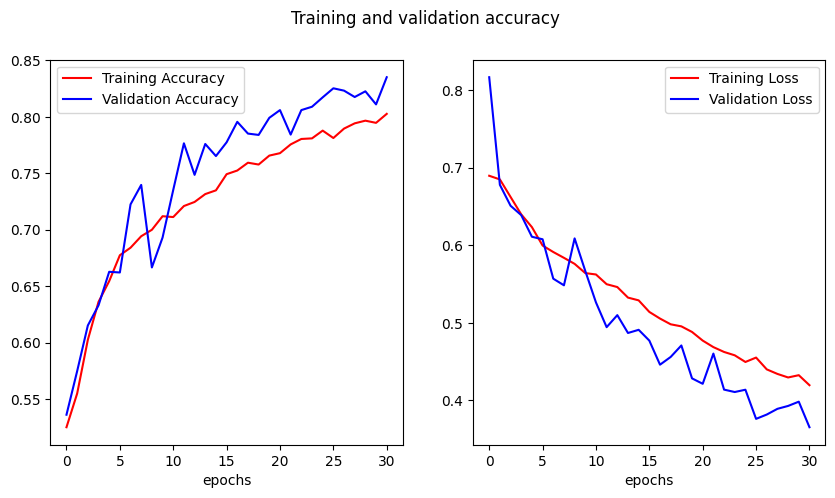

In [19]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

Unlike the previous assignment, this time the model should not be overfitting, which means that it is doing a great job at classifying the images in the training and validation sets. 

**To pass this assignment your model should have achieved a training accuracy of 80% and a validation accuracy of 80% and show no signs of overfitting**. 

To test the overfitting two tests will be conducted:
- The `Mean Squared Error` between your training and validation curves should be 20% at most

- The relative difference between the slopes of the training and validation curves should be 30% at most

You can run the next cell to check if these conditions are met. If your model didn't achieve these thresholds, try training again with a different model architecture and remember to use at least 3 convolutional layers.


In [20]:
# Test your code!
unittests.test_history(history)

 All tests passed!


**Before submitting your assignment, please run the following code to save your training history as it will be used in grading.**

In [21]:
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

**Congratulations on finishing this week's assignment!**

You have successfully implemented a convolutional neural network that classifies images of cats and dogs without overfitting by using data augmentation techniques, along with the helper functions needed to pre-process the images!

**Keep it up!**